<a href="https://colab.research.google.com/github/samula98/proj3pt1v00/blob/main/Copy_of_SQL_1_Chinook_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [2]:
# Download the Chinook sqlite database
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [3]:
# unzipping file
!unzip -u chinook.zip


Archive:  chinook.zip
  inflating: chinook.db              


In [4]:
# listing out all the files
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 18:33 .
drwxr-xr-x 1 root root   4096 Oct 29 18:31 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 18:33 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 28 13:26 .config
drwxr-xr-x 1 root root   4096 Oct 28 13:27 sample_data


In [5]:
# List of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables
;

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [6]:
# Show schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema
;

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [7]:
# Count of number of unique albums
%%script sqlite3 --column --header chinook.db
select count(distinct AlbumID)
from tracks
;

count(distinct AlbumID)
-----------------------
347                    


In [8]:
# Count of number of countries that have records
%%script sqlite3 --column --header chinook.db
select count(distinct BillingCity)
from invoices
;

count(distinct BillingCity)
---------------------------
53                         


In [9]:
# Count of countries of the customers
%%script sqlite3 --column --header chinook.db
select count(distinct Country)
from customers
;

count(distinct Country)
-----------------------
24                     


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



In [10]:
# What sort of information is in this dataset?
# There is information about the relation between employees, customers, invoices, albums, artists,
# tracks, playlists, and genres within the ER diagram. There is also the names and ID numbers of
# the different objects within each table.

# How many records are there?
# 347 unique albums

# How many different countries (states, counties, cities, etc) have records in this data set?
# 53 unique cities from invoices
# 24 unique countries from customers

## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


In [11]:
# What are the first 10 entries from the albums table?
%%script sqlite3 --column --header chinook.db
select *
from albums
limit 10
;

AlbumId  Title                                  ArtistId
-------  -------------------------------------  --------
1        For Those About To Rock We Salute You  1       
2        Balls to the Wall                      2       
3        Restless and Wild                      2       
4        Let There Be Rock                      1       
5        Big Ones                               3       
6        Jagged Little Pill                     4       
7        Facelift                               5       
8        Warner 25 Anos                         6       
9        Plays Metallica By Four Cellos         7       
10       Audioslave                             8       


In [12]:
# What are the names of the countries that the customers are from?
%%script sqlite3 --column --header chinook.db
select distinct Country
from Customers
;

Country       
--------------
Brazil        
Germany       
Canada        
Norway        
Czech Republic
Austria       
Belgium       
Denmark       
USA           
Portugal      
France        
Finland       
Hungary       
Ireland       
Italy         
Netherlands   
Poland        
Spain         
Sweden        
United Kingdom
Australia     
Argentina     
Chile         
India         


In [13]:
# Join the artists with their albums, show Name Title and Artist ID from artist and albums tables
# could swap lines 5&6 with lines 7&8 but it makes it harder to read
# L join to find artists that do not have albums, 1 to many relationship always use L join
%%script sqlite3 --column --header chinook.db
select artists.Name, artists.ArtistID, albums.ArtistID, albums.Title, albums.AlbumID, tracks.AlbumID, tracks.*
from artists
join albums
  on artists.ArtistID = albums.ArtistID
join tracks
  on albums.AlbumID = tracks.AlbumID
limit 20
;

Name    ArtistId  ArtistId  Title                                  AlbumId  AlbumId  TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice
------  --------  --------  -------------------------------------  -------  -------  -------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------
AC/DC   1         1         For Those About To Rock We Salute You  1        1        1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99     
AC/DC   1         1         For Those About To Rock We Salute You  1        1        6        Put The Finger On You                    1        1            1        Angus Young, Malco

In [14]:
# Join the artists with their albums, show Name Title and Artist ID from artist and albums tables
%%script sqlite3 --column --header chinook.db
select artists.Name, albums.Title, artists.ArtistID, albums.AlbumID
from artists
join albums
  on artists.ArtistID = albums.ArtistID
join tracks
  on albums.AlbumID = tracks.AlbumID
limit 5
;
--select *
--from tacks
--limit 5

Name   Title                                  ArtistId  AlbumId
-----  -------------------------------------  --------  -------
AC/DC  For Those About To Rock We Salute You  1         1      
AC/DC  For Those About To Rock We Salute You  1         1      
AC/DC  For Those About To Rock We Salute You  1         1      
AC/DC  For Those About To Rock We Salute You  1         1      
AC/DC  For Those About To Rock We Salute You  1         1      


#### WHERE


In [15]:
# What are Audioslaves album names?
%%script sqlite3 --column --header chinook.db
select *
from artists
join albums
on artists.ArtistID = albums.ArtistID
where Name = 'Audioslave'
;

ArtistId  Name        AlbumId  Title         ArtistId
--------  ----------  -------  ------------  --------
8         Audioslave  10       Audioslave    8       
8         Audioslave  11       Out Of Exile  8       
8         Audioslave  271      Revelations   8       


#### AND


In [16]:
# Who are the customers from Brazil with 3 as Support Rep ID?
%%script sqlite3 --column --header chinook.db
select *
from customers
where country = 'Brazil'
and SupportRepID = 3
;

CustomerId  FirstName  LastName   Company                                           Address                          City                 State  Country  PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ---------  ------------------------------------------------  -------------------------------  -------------------  -----  -------  ----------  ------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil   12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br           3           
12          Roberto    Almeida    Riotur                                            Praça Pio X, 119                 Rio de Janeiro       RJ     Brazil   20040-020   +55 (21) 2271-7000  +55 (21) 2271-7070  roberto.almeida@riotur.gov.br  3           


#### OR


In [17]:
# Who are the customers from Argentina and Brazil?
%%script sqlite3 --column --header chinook.db
select *
from customers
where country = 'Argentina'
or country = 'Brazil'
;

CustomerId  FirstName  LastName   Company                                           Address                          City                 State  Country    PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ---------  ------------------------------------------------  -------------------------------  -------------------  -----  ---------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil     12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
10          Eduardo    Martins    Woodstock Discos                                  Rua Dr. Falcão Filho, 155        São Paulo            SP     Brazil     01007-010   +55 (11) 3033-5446   +55 (11) 3033-4564  eduardo@woodstock.com.br       4

#### LIKE (with % or _ wildcard)


In [18]:
# Who are the customers with a first name that starts with the letter A?
%%script sqlite3 --column --header chinook.db
select *
from customers
where FirstName like 'A%'
;

CustomerId  FirstName  LastName  Company               Address                               City       State  Country  PostalCode  Phone               Fax                 Email                   SupportRepId
----------  ---------  --------  --------------------  ------------------------------------  ---------  -----  -------  ----------  ------------------  ------------------  ----------------------  ------------
7           Astrid     Gruber                          Rotenturmstraße 4, 1010 Innere Stadt  Vienne            Austria  1010        +43 01 5134505                          astrid.gruber@apple.at  5           
11          Alexandre  Rocha     Banco do Brasil S.A.  Av. Paulista, 2022                    São Paulo  SP     Brazil   01310-200   +55 (11) 3055-3278  +55 (11) 3055-8131  alero@uol.com.br        5           
32          Aaron      Mitchell                        696 Osborne Street                    Winnipeg   MB     Canada   R3L 2B9     +1 (204) 452-6452               

In [19]:
# Who are the customers that are from countries that end in the letter A?
%%script sqlite3 --column --header chinook.db
select *
from customers
where Country like '%a'
;

CustomerId  FirstName  LastName    Company                Address                               City            State  Country    PostalCode  Phone                Fax                Email                     SupportRepId
----------  ---------  ----------  ---------------------  ------------------------------------  --------------  -----  ---------  ----------  -------------------  -----------------  ------------------------  ------------
3           François   Tremblay                           1498 rue Bélanger                     Montréal        QC     Canada     H2G 1A7     +1 (514) 721-4711                       ftremblay@gmail.com       3           
7           Astrid     Gruber                             Rotenturmstraße 4, 1010 Innere Stadt  Vienne                 Austria    1010        +43 01 5134505                          astrid.gruber@apple.at    5           
14          Mark       Philips     Telus                  8210 111 ST NW                        Edmonton        AB  

#### BETWEEN


In [20]:
# What are the InvoiceID's that are between 25 and 35 in invoice_items?
%%script sqlite3 --column --header chinook.db
select *
from invoice_items
where InvoiceID between 25 and 35
;

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
127            25         738      0.99       1       
128            25         744      0.99       1       
129            25         750      0.99       1       
130            25         756      0.99       1       
131            25         762      0.99       1       
132            25         768      0.99       1       
133            25         774      0.99       1       
134            25         780      0.99       1       
135            25         786      0.99       1       
136            26         795      0.99       1       
137            26         804      0.99       1       
138            26         813      0.99       1       
139            26         822      0.99       1       
140            26         831      0.99       1       
141            26         840      0.99       1       
142            26         849      0.99       1       
143       

#### LIMIT



In [21]:
# What are the first 10 items in invoice_items that have a unit price of 1.99?
%%script sqlite3 --column --header chinook.db
select *
from invoice_items
where UnitPrice = 1.99
limit 10
;

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
468            87         2820     1.99       1       
469            88         2826     1.99       1       
470            88         2832     1.99       1       
471            88         2838     1.99       1       
472            88         2844     1.99       1       
473            88         2850     1.99       1       
474            88         2856     1.99       1       
475            88         2862     1.99       1       
476            88         2868     1.99       1       
477            88         2874     1.99       1       


### Sorting and Grouping


#### ORDER BY


In [22]:
# Order customers from Argentina and Brazil by their SupportRepID
%%script sqlite3 --column --header chinook.db
select *
from customers
where country = 'Argentina'
or country = 'Brazil'
order by SupportRepID
;

CustomerId  FirstName  LastName   Company                                           Address                          City                 State  Country    PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ---------  ------------------------------------------------  -------------------------------  -------------------  -----  ---------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil     12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
12          Roberto    Almeida    Riotur                                            Praça Pio X, 119                 Rio de Janeiro       RJ     Brazil     20040-020   +55 (21) 2271-7000   +55 (21) 2271-7070  roberto.almeida@riotur.gov.br  3

#### DISTINCT


In [23]:
# How many distinct GenreID's are there in tracks?
%%script sqlite3 --column --header chinook.db
select count(distinct GenreID)
from tracks
;

count(distinct GenreID)
-----------------------
25                     


#### GROUP BY



In [24]:
# Group Milliseconds, Bytes, TrackID, Name in tracks by Milliseconds
%%script sqlite3 --column --header chinook.db
select Milliseconds, Bytes, TrackID, Name
from tracks
group by Milliseconds
limit 10
;

Milliseconds  Bytes    TrackId  Name                    
------------  -------  -------  ------------------------
1071          38747    2461     É Uma Partida De Futebol
4884          161266   168      Now Sports              
6373          211997   170      A Statistic             
6635          224313   178      Oprah                   
7941          319888   3304     Commercial 1            
11650         387360   172      The Real Problem        
21211         850698   3310     Commercial 2            
29048         967098   2241     Bossa                   
32287         1039615  1086     Casinha Feliz           
33149         1103013  246      Mateus Enter            


In [25]:
# Group Milliseconds, Bytes, TrackID, Name in tracks by Bytes
%%script sqlite3 --column --header chinook.db
select Milliseconds, Bytes, TrackID, Name
from tracks
group by Bytes
limit 10
;

Milliseconds  Bytes    TrackId  Name                    
------------  -------  -------  ------------------------
1071          38747    2461     É Uma Partida De Futebol
4884          161266   168      Now Sports              
6373          211997   170      A Statistic             
6635          224313   178      Oprah                   
7941          319888   3304     Commercial 1            
11650         387360   172      The Real Problem        
21211         850698   3310     Commercial 2            
29048         967098   2241     Bossa                   
32287         1039615  1086     Casinha Feliz           
33619         1095012  975      Deixa Entrar            


### Aggregates


#### MAX


In [26]:
# What is the longest song from tracks?
%%script sqlite3 --column --header chinook.db
select max(Milliseconds)
from tracks
;

max(Milliseconds)
-----------------
5286953          


In [27]:
# What is the largest song from tracks?
%%script sqlite3 --column --header chinook.db
select max(Bytes)
from tracks
;

max(Bytes)
----------
1059546140


#### MIN


In [28]:
# What is the shortest song from tracks?
%%script sqlite3 --column --header chinook.db
select min(Milliseconds)
from tracks
;

min(Milliseconds)
-----------------
1071             


In [29]:
# What is the smallest song from tracks?
%%script sqlite3 --column --header chinook.db
select min(Bytes)
from tracks
;

min(Bytes)
----------
38747     


#### SUM


In [30]:
# What is the sum of invoices?
%%script sqlite3 --column --header chinook.db
select sum(total)
from invoices
;

sum(total)
----------
2328.6    


In [31]:
# What is the sum of the number of invoice items?
%%script sqlite3 --column --header chinook.db
select sum(quantity)
from invoice_items
;

sum(quantity)
-------------
2240         


In [32]:
# What is the sum of UnitPrice in invoice_itmes?
%%script sqlite3 --column --header chinook.db
select sum(UnitPrice)
from invoice_items
;

sum(UnitPrice)  
----------------
2328.59999999996


#### AVG


In [33]:
# What is the average of UnitPrice in invoice_items?
%%script sqlite3 --column --header chinook.db
select avg(UnitPrice)
from invoice_items
;

avg(UnitPrice)  
----------------
1.03955357142855


In [34]:
# What is the average of Quantity in invoice_items?
%%script sqlite3 --column --header chinook.db
select avg(Quantity)
from invoice_items
;

avg(Quantity)
-------------
1.0          


In [35]:
# What is the average time in tracks?
%%script sqlite3 --column --header chinook.db
select avg(Milliseconds)
from tracks
;

avg(Milliseconds)
-----------------
393599.212103911 


In [36]:
# What is the average size (in bytes) in tracks?
%%script sqlite3 --column --header chinook.db
select avg(Bytes)
from tracks
;

avg(Bytes)      
----------------
33510207.0653725


#### COUNT



In [37]:
# How many unique albums are there?
%%script sqlite3 --column --header chinook.db
select count(distinct AlbumID)
from tracks
;

count(distinct AlbumID)
-----------------------
347                    


In [38]:
# How many countries are the customers from?
%%script sqlite3 --column --header chinook.db
select count(distinct Country)
from customers
;

count(distinct Country)
-----------------------
24                     


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [39]:
# This whole section was inspired by Minerva and Wil

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [40]:
# Makes a chart of employee IDs, their name, and their total sales
# Connect to the database
chin = sqlite3.connect('chinook.db')
# Define SQL query
query = """
select
  Employees.EmployeeID,
  Employees.FirstName,
  Employees.LastName,
  sum(invoices.Total) as TotalSales
from employees
left join customers on EmployeeID = customers.SupportRepID
left join invoices on customers.CustomerID = invoices.CustomerID
group by Employees.EmployeeID, Employees.FirstName, Employees.LastName
order by TotalSales desc
;
"""
# Get query and store results in a data frame
df = pd.read_sql_query(query, chin)
# Close connection
chin.close()
# Print head of df
print(df)#.head())

   EmployeeId FirstName  LastName  TotalSales
0           3      Jane   Peacock      833.04
1           4  Margaret      Park      775.40
2           5     Steve   Johnson      720.16
3           1    Andrew     Adams         NaN
4           2     Nancy   Edwards         NaN
5           6   Michael  Mitchell         NaN
6           7    Robert      King         NaN
7           8     Laura  Callahan         NaN


In [41]:
chin = sqlite3.connect('chinook.db')
# modifying query to have all employees - turn NaN to zeros
query = """
select
  Employees.EmployeeID,
  Employees.FirstName,
  Employees.LastName,
  coalesce(sum(invoices.Total), 0) as TotalSales --using coalesce to handle null values
from employees
left join customers on EmployeeID = customers.SupportRepID
left join invoices on customers.CustomerID = invoices.CustomerID
group by Employees.EmployeeID, Employees.FirstName, Employees.LastName
order by TotalSales desc
;
"""
# create query and store as data frame
df0 = pd.read_sql_query(query, chin)
# print df
print(df0)
chin.close()

   EmployeeId FirstName  LastName  TotalSales
0           3      Jane   Peacock      833.04
1           4  Margaret      Park      775.40
2           5     Steve   Johnson      720.16
3           1    Andrew     Adams        0.00
4           2     Nancy   Edwards        0.00
5           6   Michael  Mitchell        0.00
6           7    Robert      King        0.00
7           8     Laura  Callahan        0.00


In [42]:
# Abbreviating so I don't have to type as much
chin = sqlite3.connect('chinook.db')
query = """
select
  E.EmployeeID,
  E.FirstName,
  E.LastName,
  coalesce(sum(I.Total), 0) as TotalSales
from employees E
left join customers C on E.EmployeeID = C.SupportRepID
left join invoices I on C.CustomerID = I.CustomerID
group by E.EmployeeID, E.FirstName, E.LastName
order by TotalSales desc
;
"""
df1 = pd.read_sql_query(query, chin)
print(df1)
chin.close()

   EmployeeId FirstName  LastName  TotalSales
0           3      Jane   Peacock      833.04
1           4  Margaret      Park      775.40
2           5     Steve   Johnson      720.16
3           1    Andrew     Adams        0.00
4           2     Nancy   Edwards        0.00
5           6   Michael  Mitchell        0.00
6           7    Robert      King        0.00
7           8     Laura  Callahan        0.00


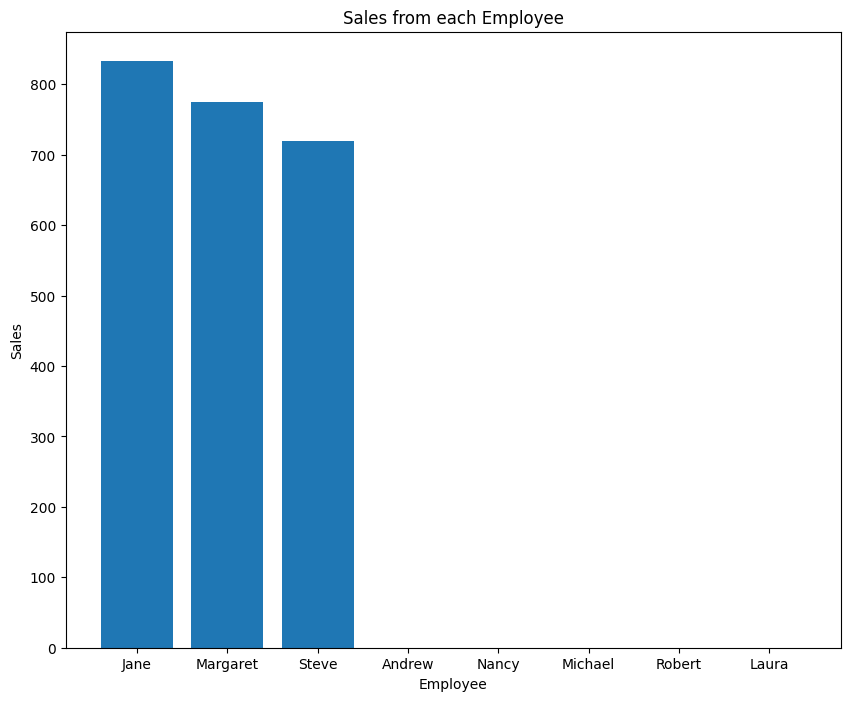

In [43]:
# Plot of sales from employees (same as above but in chart form)
chin = sqlite3.connect('chinook.db')
query = """
select
  E.EmployeeID,
  E.FirstName,
  E.LastName,
  coalesce(sum(I.Total), 0) as TotalSales
from employees E
left join customers C on E.EmployeeID = C.SupportRepID
left join invoices I on C.CustomerID = I.CustomerID
group by E.EmployeeID, E.FirstName, E.LastName
order by TotalSales desc
;
"""
# Reading in the data
df1 = pd.read_sql_query(query, chin)
# Save the data to csv file
df1.to_csv('output.csv', index = False)
# Plot
plt.figure(figsize = (10,8))
plt.bar(df1['FirstName'], df1['TotalSales'])
plt.title('Sales from each Employee')
plt.xlabel('Employee')
plt.ylabel('Sales')
plt.show()

In [44]:
%%script sqlite3 --column --header chinook.db
select country, count(*) as CustomerCount
from customers
group by country
order by customercount desc
;

Country         CustomerCount
--------------  -------------
USA             13           
Canada          8            
France          5            
Brazil          5            
Germany         4            
United Kingdom  3            
Portugal        2            
India           2            
Czech Republic  2            
Sweden          1            
Spain           1            
Poland          1            
Norway          1            
Netherlands     1            
Italy           1            
Ireland         1            
Hungary         1            
Finland         1            
Denmark         1            
Chile           1            
Belgium         1            
Austria         1            
Australia       1            
Argentina       1            


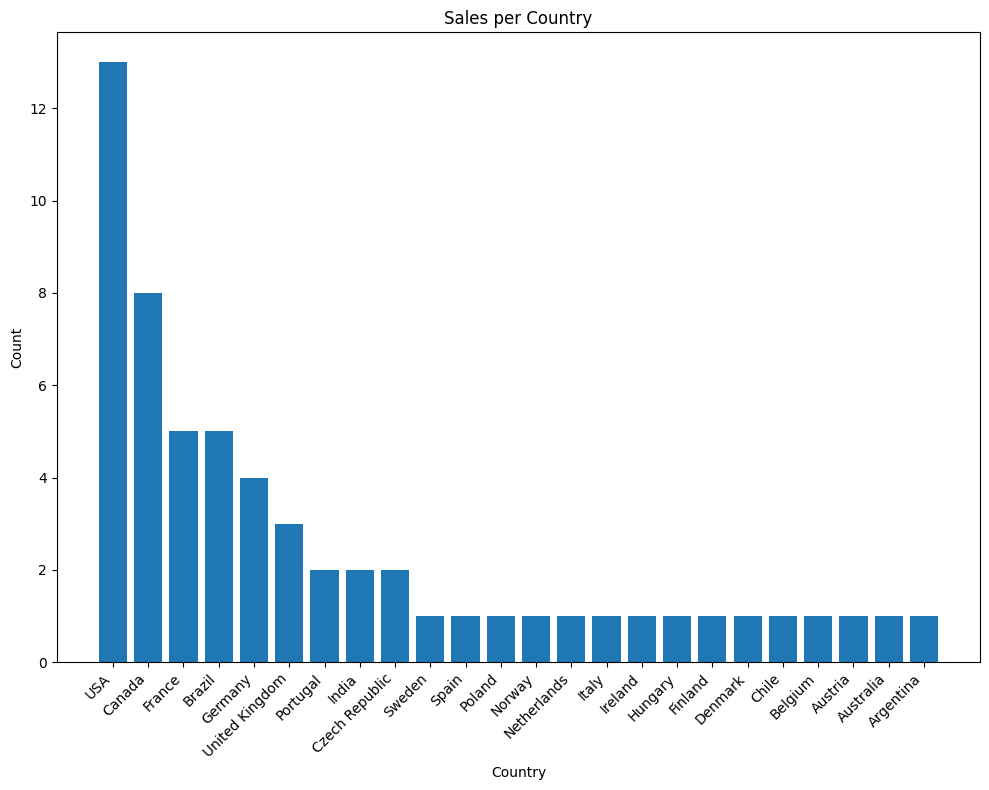

In [49]:
# Count of customers in countries
chin = sqlite3.connect('chinook.db')
query = """
select country, count(*) as CustomerCount
from customers
group by country
order by CustomerCount desc
;
"""
df2 = pd.read_sql_query(query, chin)

chin.close()

plt.figure(figsize = (10,8))
plt.bar(df2['Country'], df2['CustomerCount'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Sales per Country')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data
